# Cutout of images

To work and test faster, it can be useful to work with cutouts of images instead of the full images. This notebook allows to create cutouts of many images at the same time, even with different pixel scales (as long as they have a valid WCS).

In [ ]:
import os
from typing import Union
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from astropy.wcs.utils import proj_plane_pixel_scales
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize, MinMaxInterval, ZScaleInterval, LogStretch
from astropy.visualization.wcsaxes import add_scalebar
import astropy.units as u
import dja_sepp

## Simple cutout

First, let's make a cutout on a single image to choose framing (`center` and `size`).

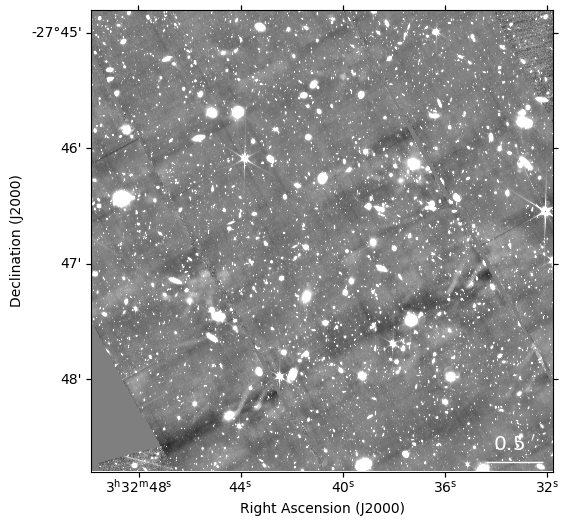

In [4]:
filename = f"/FlashStorage/image/GDS/gds-grizli-v7.2-f200w-clear_drc_sci.fits"
# filename = f"/home/ec2-user/DAWN/DJA-SEpp/image/GDS/gds-grizli-v7.2-f200w-clear_drc_sci_cutout.fits"

hdu = fits.open(filename, memmap=True)[0]
wcs = WCS(hdu.header)

center = SkyCoord('53.17 -27.78', frame='icrs', unit='deg') # GDS
# center = SkyCoord('10h00m35s 02d20m00s', frame='icrs') # COSMOS
# center = SkyCoord('14h19m45s 52d54m00s', frame='icrs') # CEERS
size=u.Quantity((4.0,4.0), u.arcmin)

cutout = Cutout2D(hdu.data, 
                  position=center, size=size, 
                  wcs=wcs,
                  mode='partial', fill_value=0.0)

fig, ax = plt.subplots(figsize=(6,6), subplot_kw={'projection':cutout.wcs})
norm = ImageNormalize(cutout.data, interval=ZScaleInterval())
# norm = ImageNormalize(cutout.data, interval=MinMaxInterval(), stretch=LogStretch())
ax.imshow(cutout.data, cmap='gray', origin='lower', norm=norm)
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')
dja_sepp.utils.add_good_scalebar(ax, cutout.wcs)
plt.show()

## Batch cutouts

Now that we chose the framing for the cutouts, we can create cutouts for all the images we want, even with different pixel scales as the code uses the WCS.

To select the images, we use [`glob.glob`](https://docs.python.org/3/library/glob.html) which understands wildcards (*,?). We also have to specify a folder to save the cutouts in. By default, it will create a "cutout" folder inside the folder with your images.

Number of images found : 34
Images found :
/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/gds-grizli-v7.2-f090w-clear_drc_sci_cutout.fits
/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/gds-grizli-v7.2-f090w-clear_drc_wht_cutout.fits
/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/gds-grizli-v7.2-f115w-clear_drc_sci_cutout.fits
/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/gds-grizli-v7.2-f115w-clear_drc_wht_cutout.fits
/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/gds-grizli-v7.2-f150w-clear_drc_sci_cutout.fits
/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/gds-grizli-v7.2-f150w-clear_drc_wht_cutout.fits
/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/gds-grizli-v7.2-f182m-clear_drc_sci_cutout.fits
/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/gds-grizli-v7.2-f182m-clear_drc_wht_cutout.fits
/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/gds-grizli-v7.2-f200w-clear_drc_sci_cutout.fits
/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/gds-grizli-v7.2-f200w-clear_drc_wht_cutout.fits
/home/ec2-user/DA

/home/ec2-user/miniconda3/envs/dawn-310/lib/python3.10/site-packages/astropy/visualization/mpl_normalize.py:179: RuntimeWarning: invalid value encountered in divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


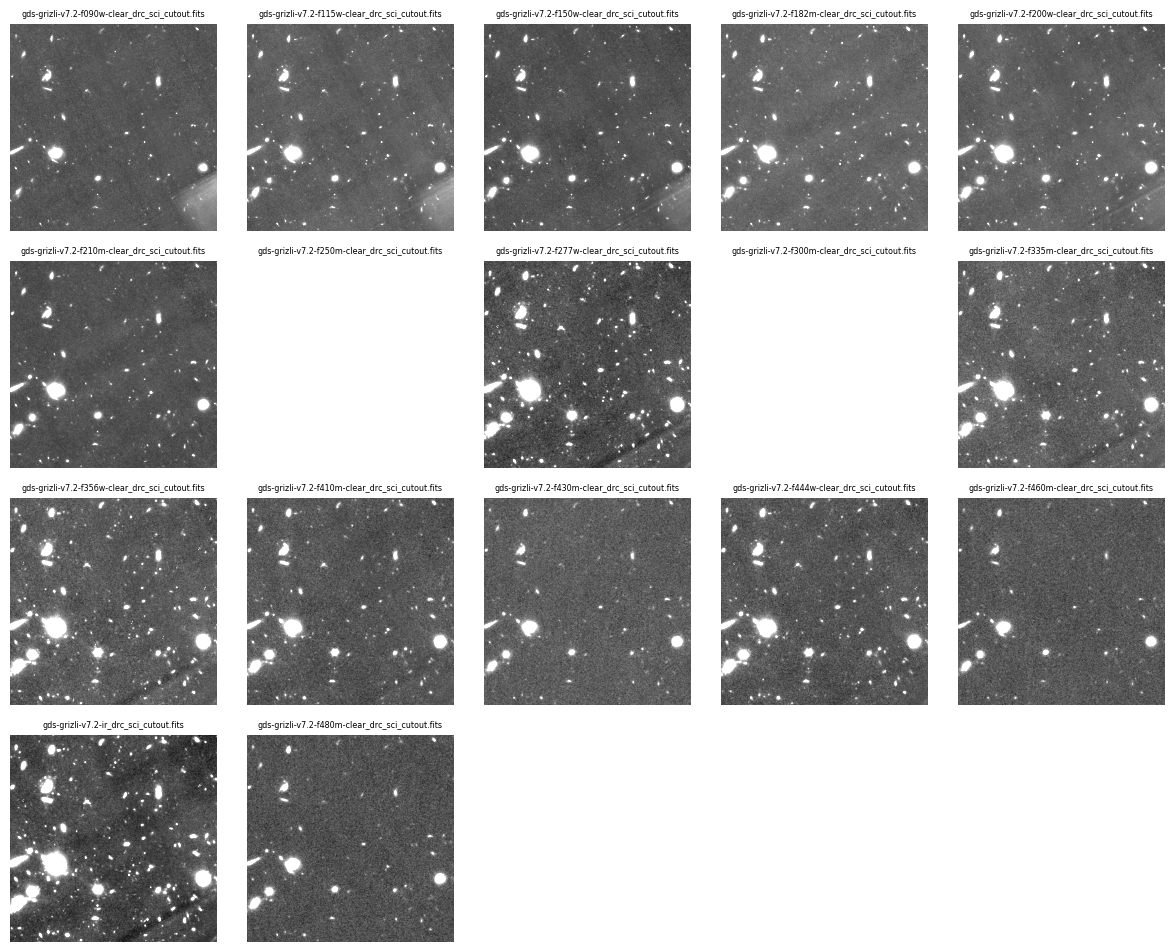

In [4]:
center = SkyCoord('53.17 -27.78', frame='icrs', unit='deg') # GDS
# center = SkyCoord('10h00m35s 02d20m00s', frame='icrs') # COSMOS
# center = SkyCoord('14h19m39s 52d54m00s', frame='icrs') # CEERS
size=u.Quantity((0.5,0.5), u.arcmin)

dja_sepp.utils.save_cutouts(generic_filename="/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/*.fits", 
             center=center, size=size,
             plot=True, plot_str="sci", verbose=True)
# save_cutouts(generic_filename="/FlashStorage/image/GDS/*.fits", 
#              center=center, size=size,
#              plot=True, plot_str="sci", verbose=True)